<font size=5><b>EDA

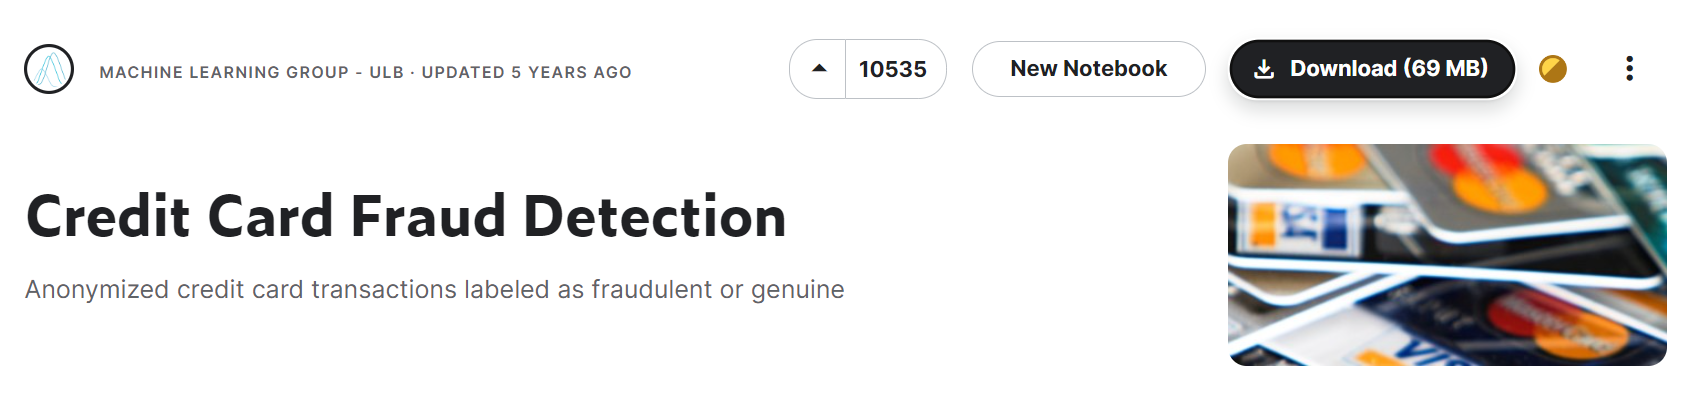
* ref : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------ 훈련데이터
from sklearn.datasets import load_iris
# --------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# -------------------------------------------------------------------------- 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# -------------------------------------------------------------------------- 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# -------------------------------------------------------------------------- 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# -------------------------------------------------------------------------- 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
# -------------------------------------------------------------------------- 교차검증
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------------------------------

import warnings
warnings.filterwarnings(action="ignore")

#----------------------------------- 차트 : seaborn 스타일 적용
sns.set()

In [2]:
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 차트 관련 속성 (차트크기 ) -----------
# plt.rcParams['figure.figsize'] = (4, 2)
# plt.rcParams['font.size'] = 7

# PCA 원리

<class 'numpy.ndarray'> 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
val:  
 [2.93808505 0.9201649  0.14774182 0.02085386]
vec:  
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
[0.7296244541329983, 0.22850761786701818, 0.03668921889282866, 0.005178709107154747]
          pc1       pc2        class
78   0.664800  0.225928  Versicolour
44  -2.137059 -1.142229       Setosa
123  1.333232  0.481811    Virginica
30  -2.140122  0.504541       Setosa
64  -0.033355  0.439003  Versicolour


<Axes: xlabel='pc1', ylabel='pc2'>

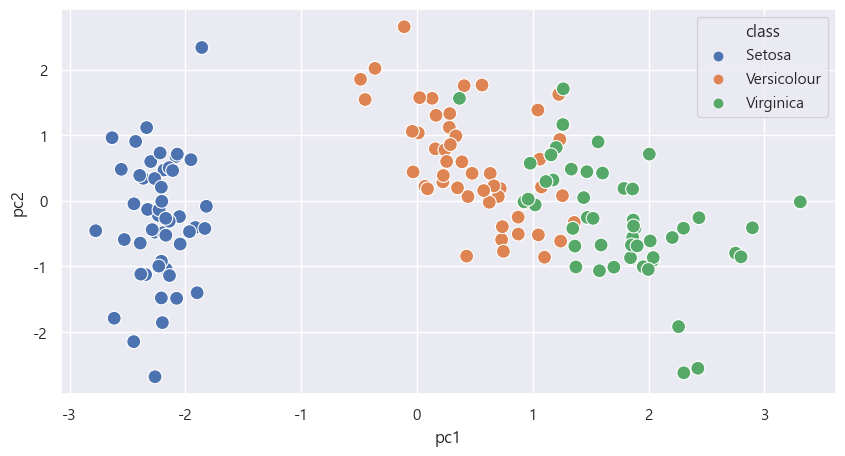

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
print(type(X), "\n", X[:5])

#--- 스케일링
from sklearn import preprocessing
std = preprocessing.StandardScaler()
X_std = std.fit_transform(X)
print(X_std[:5])


# --- 공분산행렬 & 고유백터
import numpy as np
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

np.sort(eigenvalues)[::-1]

print("val: ", "\n", eigenvalues)
print("vec: ", "\n", eigenvectors)


#--- eigen value ratio
explained_variances = []
sums = np.sum(eigenvalues)

for v in eigenvalues:
    explained_variances.append(v/sums)
print(explained_variances)


pc1 = X_std.dot(eigenvectors.T[0])
pc2 = X_std.dot(eigenvectors.T[1])

df_pc = pd.DataFrame(data=pc1, columns=['pc1'])
df_pc['pc2'] = pc2
df_pc['class'] = iris.target 

col_mapping = {0:'Setosa', 1:'Versicolour', 2:'Virginica'}
df_pc['class'] = df_pc['class'].map(lambda x : col_mapping[x])
print( df_pc.sample(5) )


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x='pc1', y='pc2', data=df_pc, hue=df_pc['class'], s=100)


# Data Load
* df.info()
* df.shape
* df.head()

In [4]:
df = pd.read_csv("./creditcard.csv")
# df.columns = df.columns.str.lower()
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# EDA

## 분포도

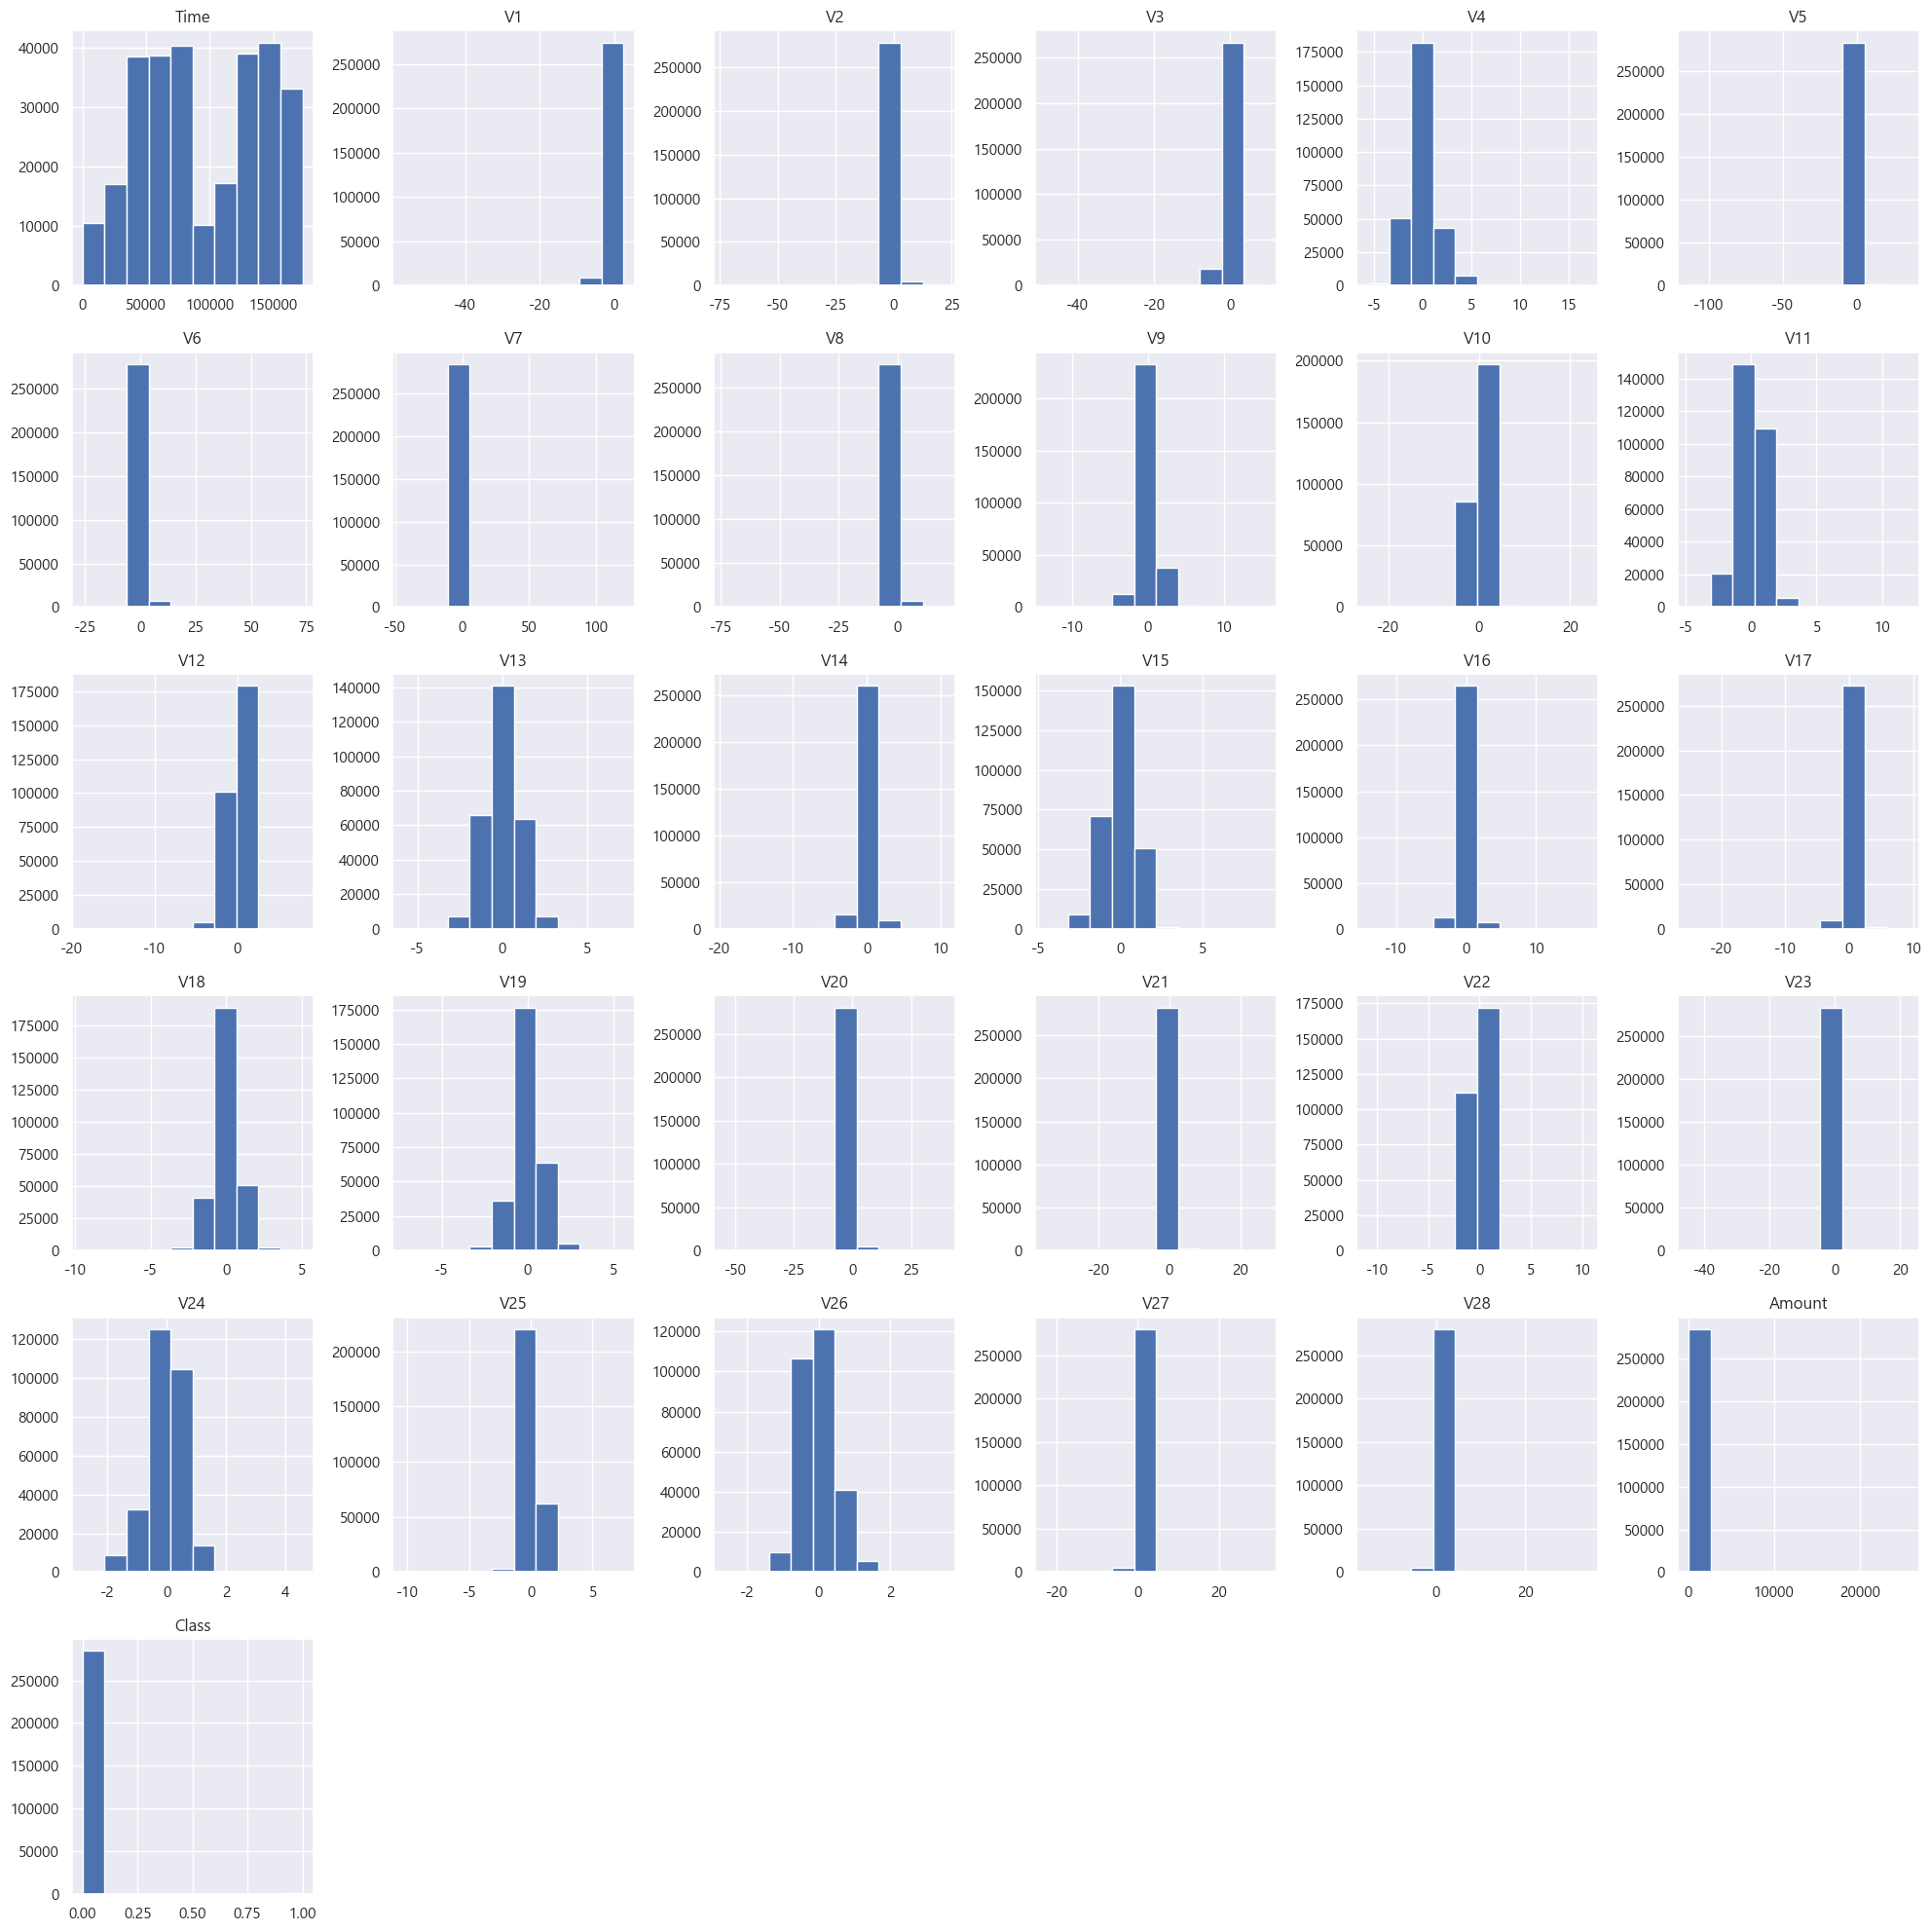

In [6]:
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## 타켓 분포도
* 불균형 체크
* 492(0.172%) frauds out of 284,807(99.728%) transactions

0    284315
1       492
Name: Class, dtype: int64


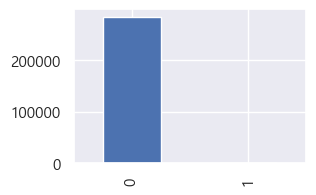

In [8]:
print( df['Class'].value_counts() )
plt.figure(figsize=(3,2))
df['Class'].value_counts().plot(kind='bar')
plt.show()

## Time & Amount

<Figure size 300x200 with 0 Axes>

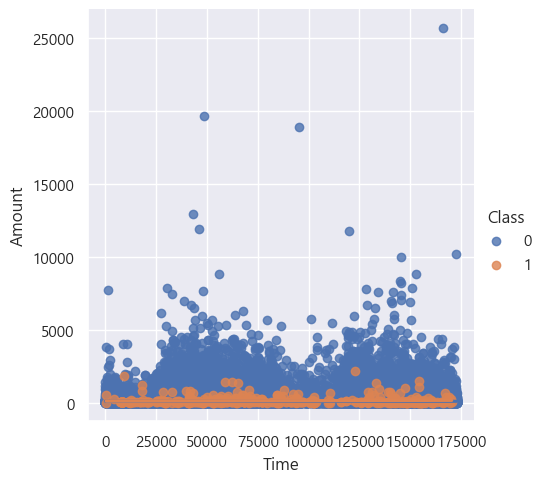

In [9]:
plt.figure(figsize=(3,2))
sns.lmplot(data=df, x="Time", y="Amount", hue="Class")
plt.show()

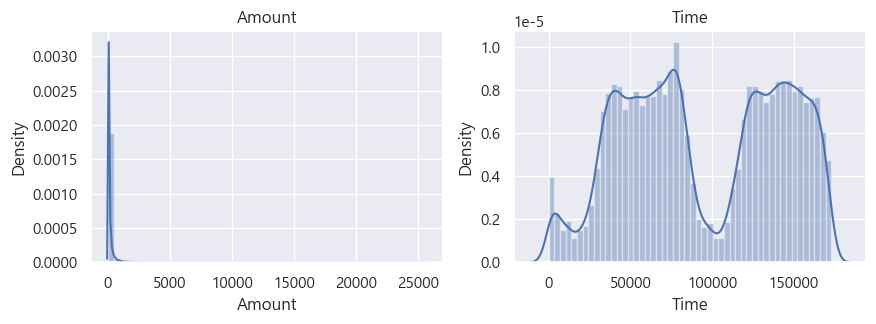

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.distplot(df['Amount'], ax=axes[0])  
axes[0].set_title("Amount")

sns.distplot(df['Time'], ax=axes[1])  
axes[1].set_title("Time")

plt.show()

In [11]:
df[['Amount','Time']].describe()

Amount           Time
count  284807.000000  284807.000000
mean       88.349619   94813.859575
std       250.120109   47488.145955
min         0.000000       0.000000
25%         5.600000   54201.500000
50%        22.000000   84692.000000
75%        77.165000  139320.500000
max     25691.160000  172792.000000

## V* 피쳐

In [12]:
v_cols = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
          'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ]

## 상관분석
*  보통 상관계수의 절대값이 0.8 이상이면 강한 상 관관계,
*  0.8에서 0.4 사이이면 중간정도의 상관관계,
*  0.4이하면 약한 상관관계

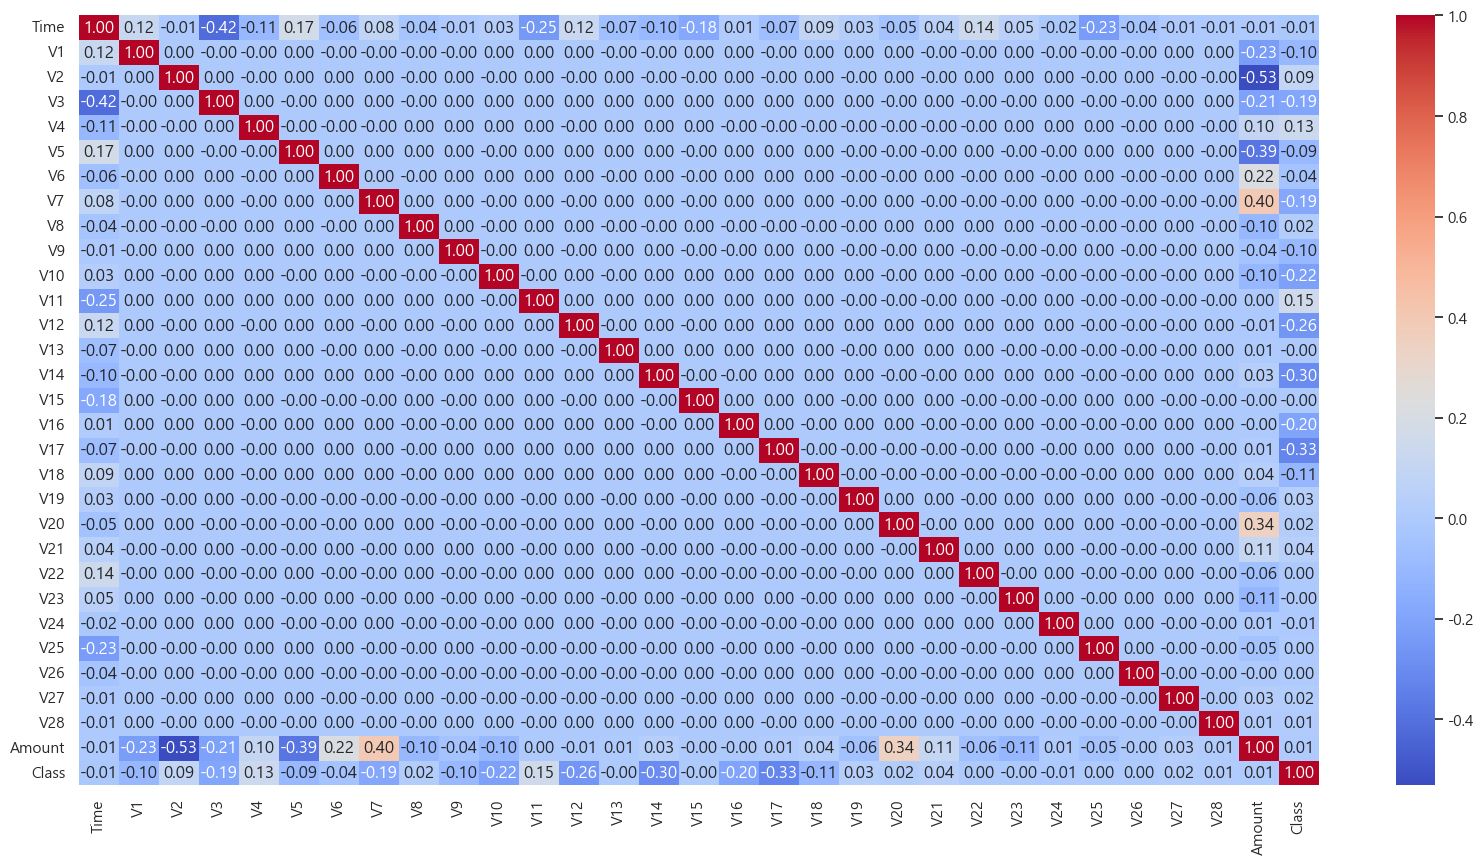

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

## 타켓 영향도 피쳐
* 'V11' 'V4'  'V17' 'V14'

['Class' 'V11' 'V4' 'V2' 'V21' 'V19']
['V17' 'V14' 'V12' 'V10' 'V16']


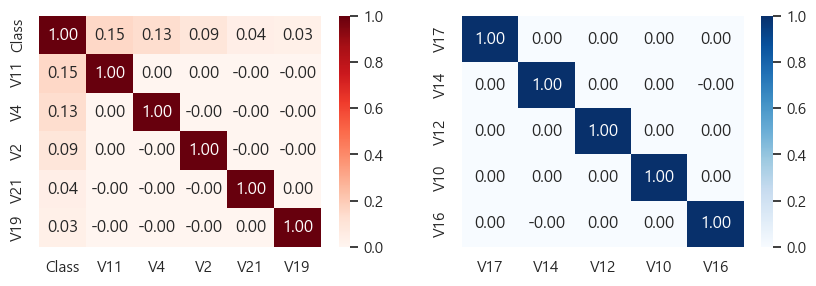

<Figure size 1000x400 with 0 Axes>

In [14]:
large_col = df.corr().nlargest(6, 'Class').index.values
small_col = df.corr().nsmallest(5, 'Class').index.values
print(large_col)
print(small_col)

fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.figure(figsize=(10,4))
sns.heatmap(df[large_col].corr(), fmt=".2f", annot=True, cmap="Reds"  , ax=axes[0])
sns.heatmap(df[small_col].corr(), fmt=".2f", annot=True, cmap="Blues" , ax=axes[1])
plt.show()

## 피쳐 별 상관관계 

In [15]:
corr_df = df.corr()
CORR_TH__ = 0.3
for col in corr_df.columns.sort_values():
    for idx in corr_df.index.sort_values():
        if idx!=col and np.abs(corr_df.loc[idx, col]) >= CORR_TH__ :  
            print( col, "\t", idx, "\t", corr_df.loc[idx, col] )

Amount 	 V2 	 -0.5314089393280346
Amount 	 V20 	 0.3394034045461662
Amount 	 V5 	 -0.38635625616306496
Amount 	 V7 	 0.39731127818168616
Class 	 V14 	 -0.3025436958044028
Class 	 V17 	 -0.32648106724371595
Time 	 V3 	 -0.41961817221152137
V14 	 Class 	 -0.3025436958044028
V17 	 Class 	 -0.32648106724371595
V2 	 Amount 	 -0.5314089393280346
V20 	 Amount 	 0.3394034045461662
V3 	 Time 	 -0.41961817221152137
V5 	 Amount 	 -0.38635625616306496
V7 	 Amount 	 0.39731127818168616


In [16]:
# corr_df

### Amount
* V2 V20 V5 V7

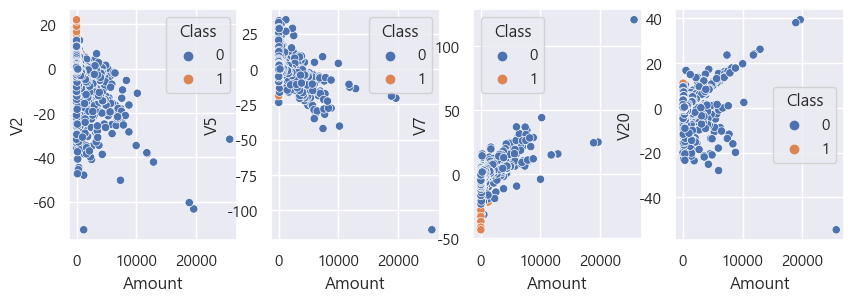

<Figure size 1000x300 with 0 Axes>

In [17]:
fig, axes = plt.subplots(1,4, figsize=(10,3))
plt.figure(figsize=(10,3))
sns.scatterplot(data=df, x="Amount",  y="V2", hue="Class" , ax=axes[0])
sns.scatterplot(data=df, x="Amount",  y="V5", hue="Class" , ax=axes[1])
sns.scatterplot(data=df, x="Amount",  y="V7", hue="Class" , ax=axes[2])
sns.scatterplot(data=df, x="Amount", y="V20", hue="Class" , ax=axes[3])
plt.show()

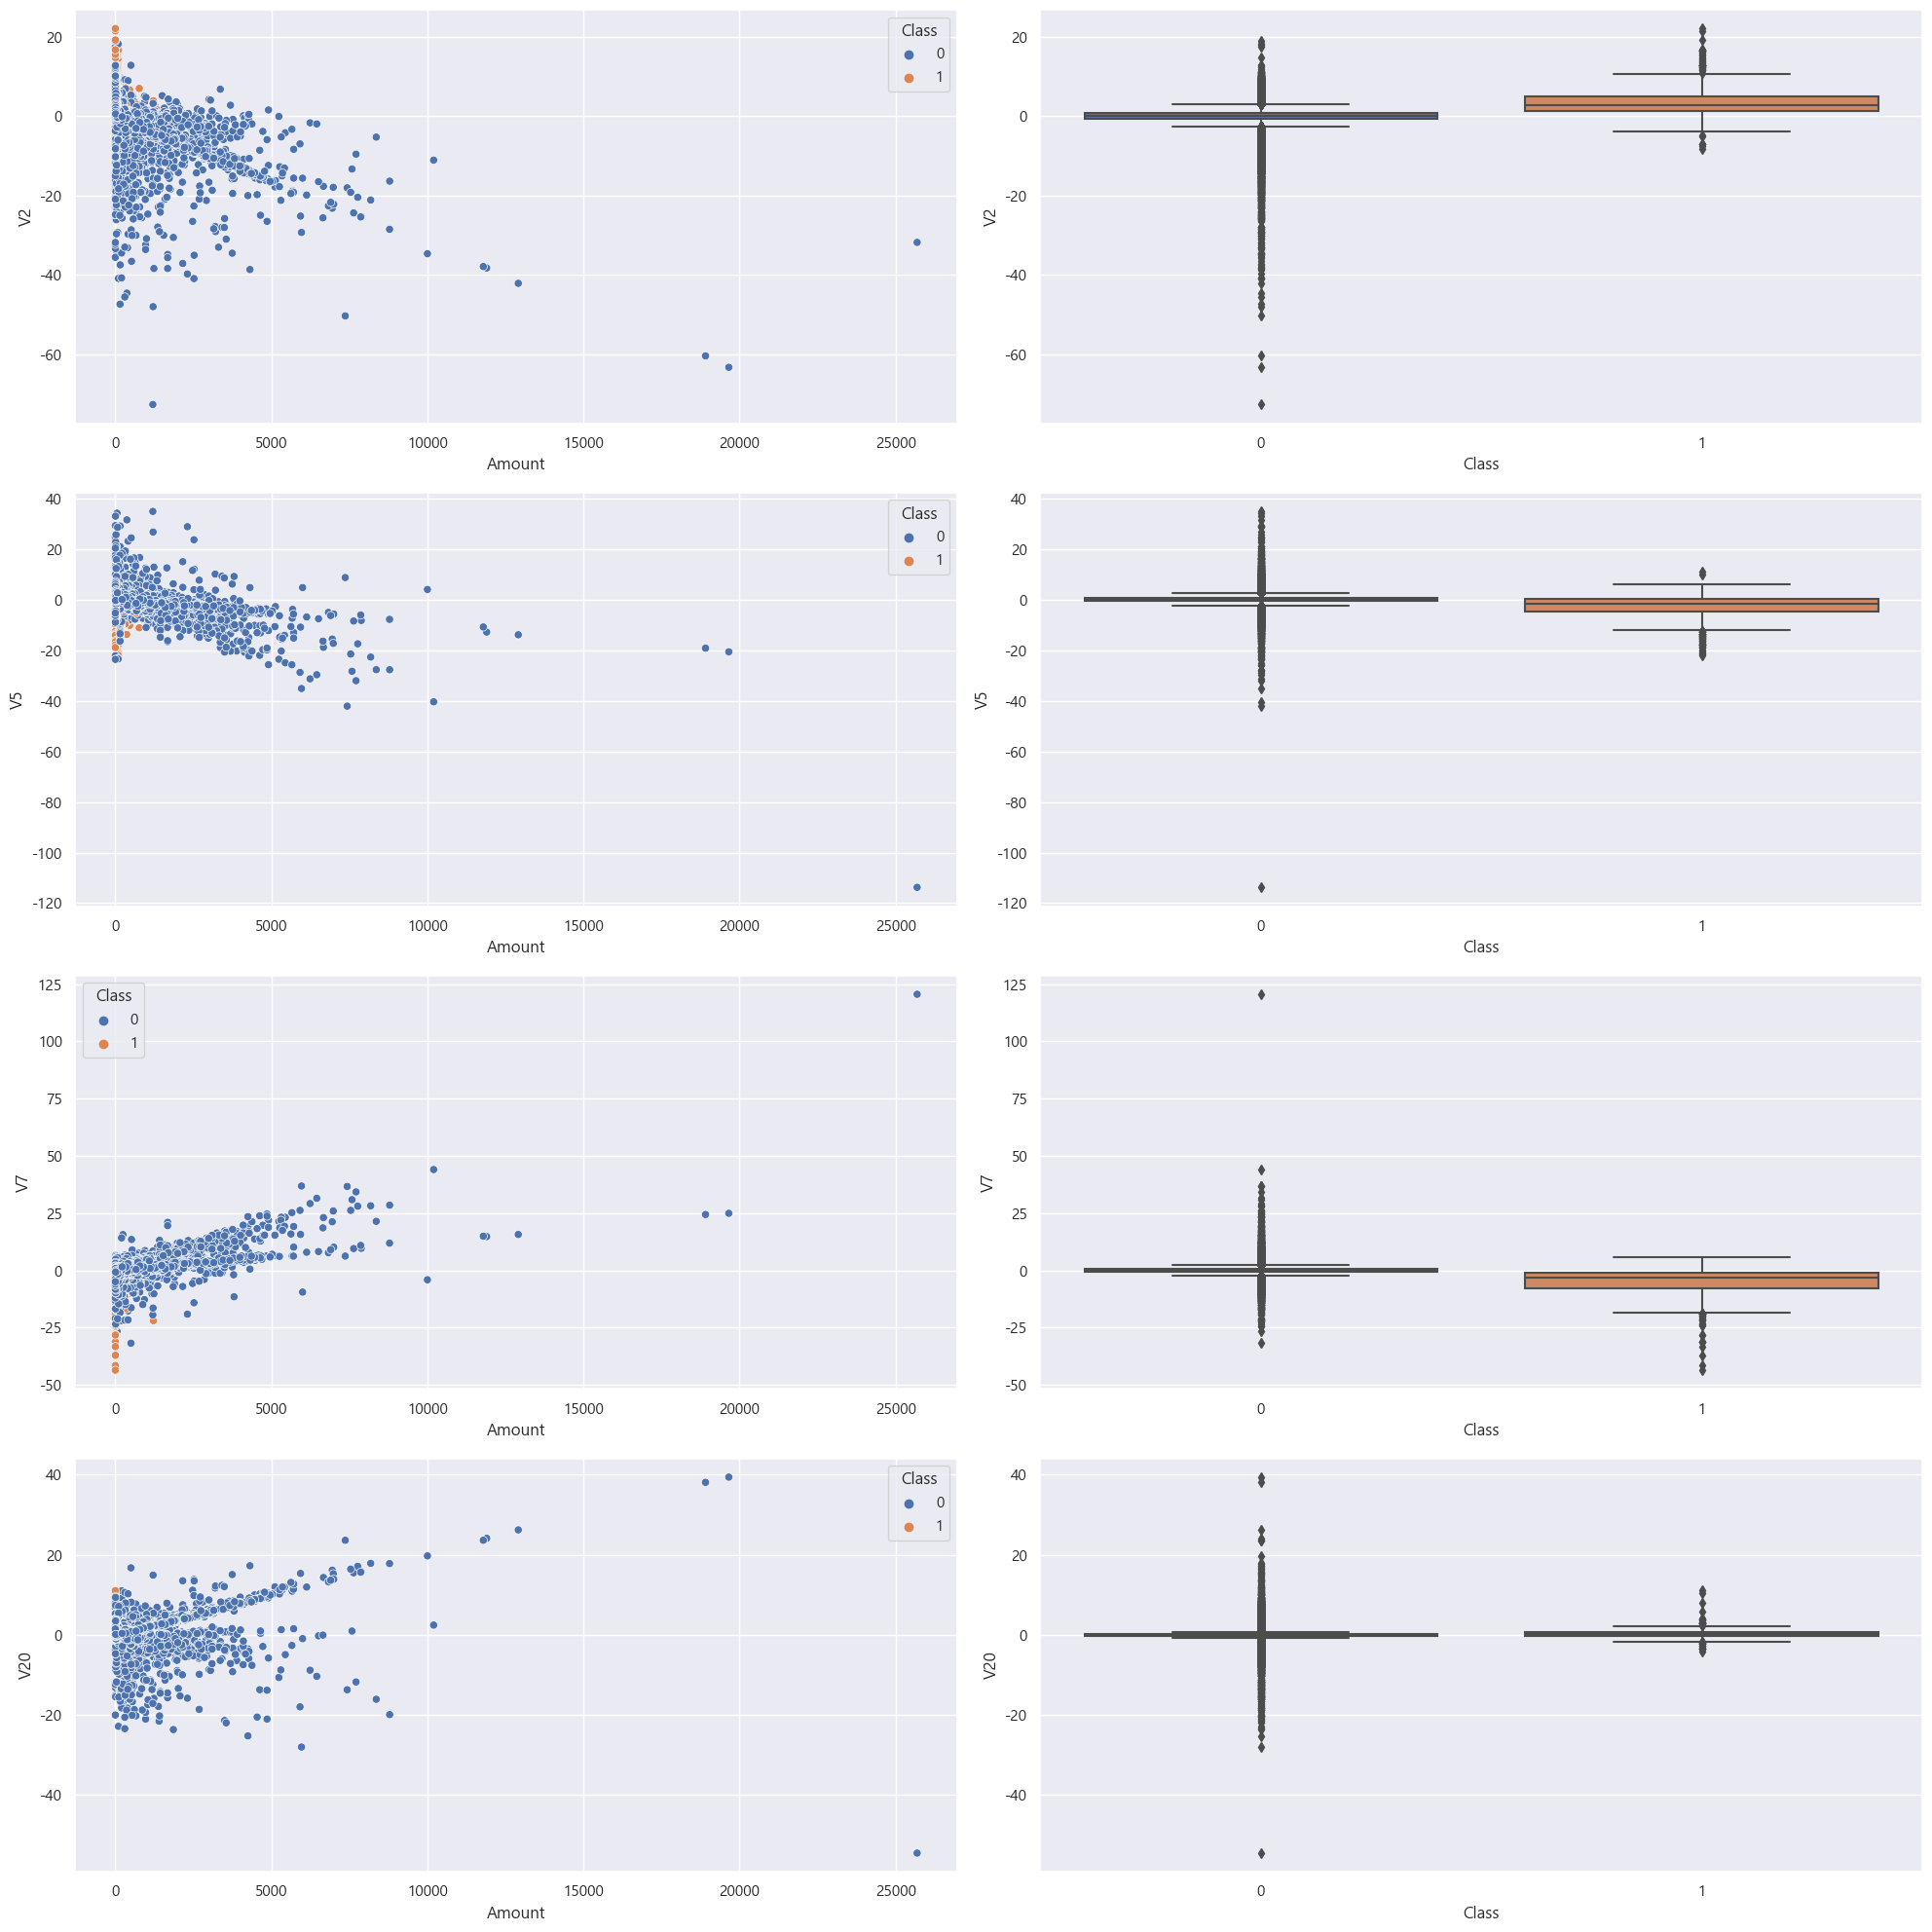

In [18]:
cols = ['V2', 'V5', 'V7', 'V20']
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(20, 20))

for i in range(len(cols)):
    col = cols[i]
    sns.scatterplot(x='Amount', y=col, data=df,hue="Class",  color="red", ax=axes[i][0])
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i][1])

plt.tight_layout()  
plt.show()

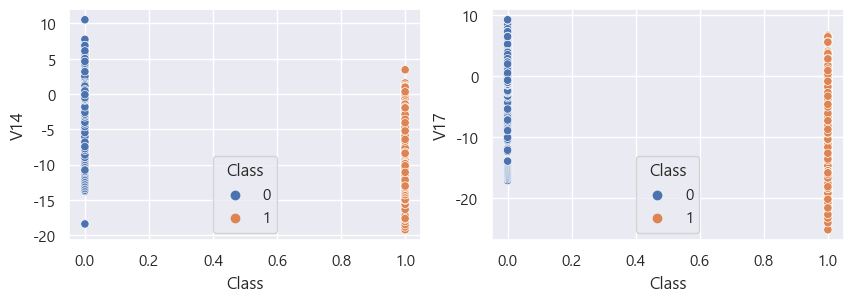

<Figure size 1000x300 with 0 Axes>

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.figure(figsize=(10,3))
sns.scatterplot(data=df, x="Class",  y="V14", hue="Class" , ax=axes[0])
sns.scatterplot(data=df, x="Class",  y="V17", hue="Class" , ax=axes[1])
plt.show()

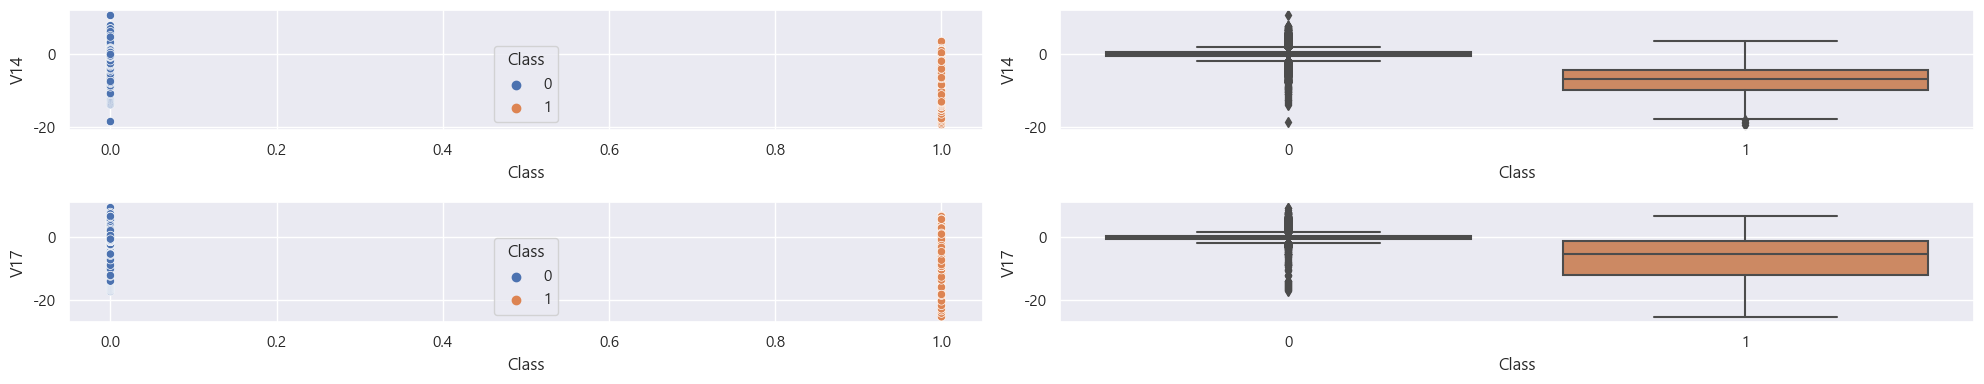

In [20]:
cols = ['V14', 'V17']
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(20, 4))

for i in range(len(cols)):
    col = cols[i]
    sns.scatterplot(x='Class', y=col, data=df,hue="Class",  color="red", ax=axes[i][0])
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i][1])

plt.tight_layout()  
plt.show()

<Figure size 500x200 with 0 Axes>

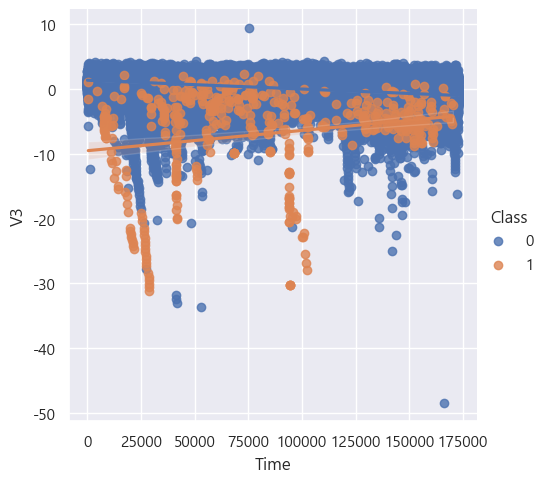

In [21]:
plt.figure(figsize=(5,2))
sns.lmplot(data=df, x="Time",  y="V3",  hue="Class")
plt.show()

* by 주용

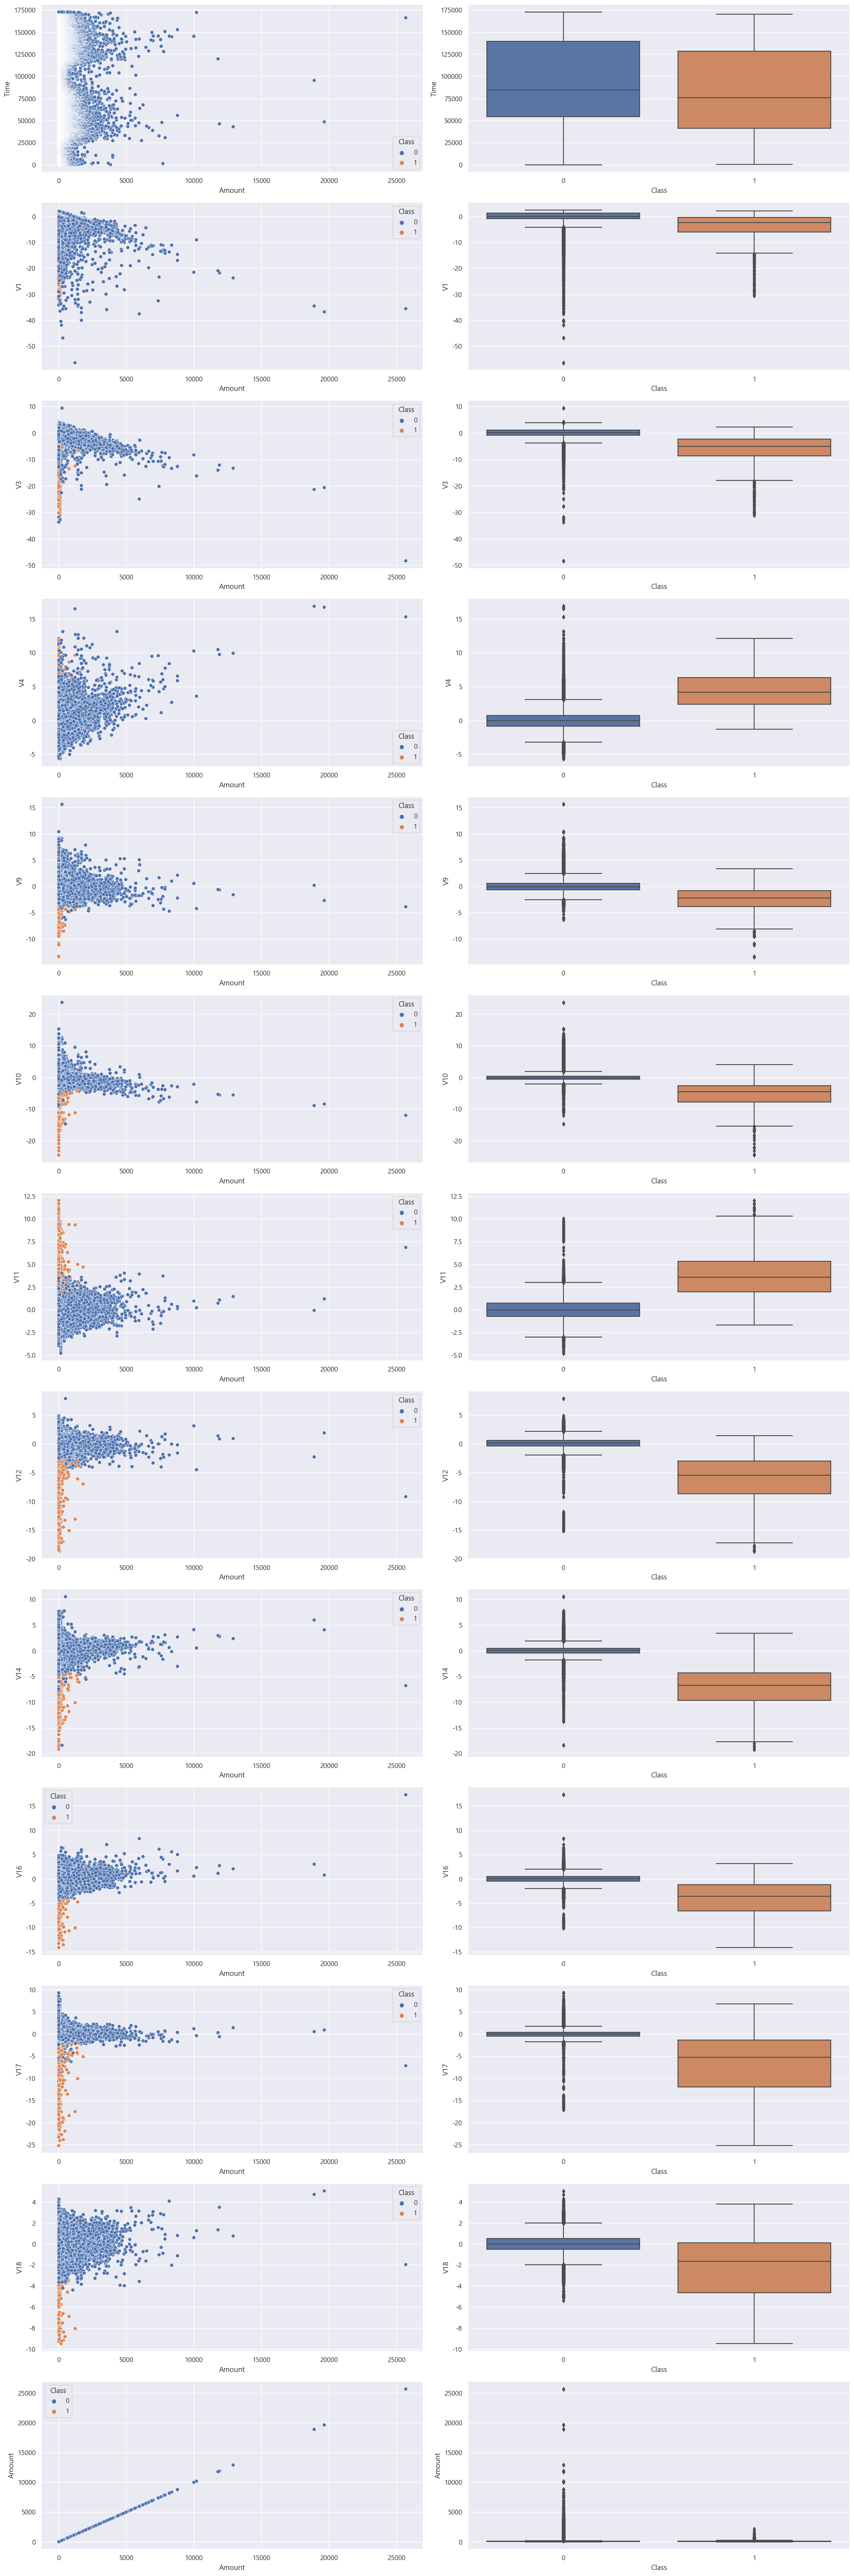

In [22]:
cols = ['Time', 'V1', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12','V14','V16','V17','V18','Amount']
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(20, 60))

for i in range(len(cols)):
    col = cols[i]
    sns.scatterplot(x='Amount', y=col, data=df,hue="Class",  color="red", ax=axes[i][0])
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i][1])

plt.tight_layout()  
plt.show()

* by 이주

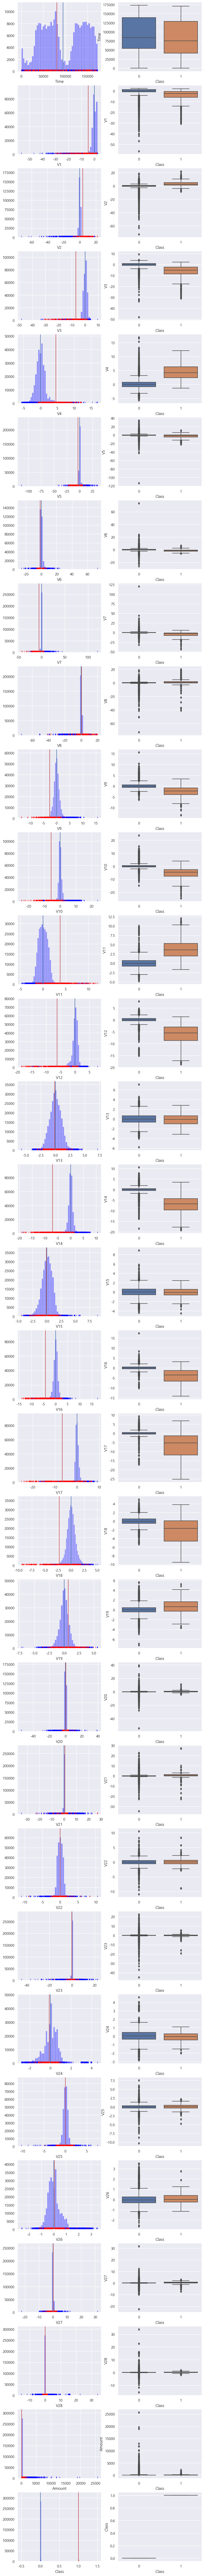

In [23]:
# cols = ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
#        'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
#        'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
#        'class']
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(10, 140))

for i in range(len(cols)):
    col = cols[i]
    sns.distplot(df[df['Class']==0][col]   , kde=False, rug=True, color="blue", fit_kws={"color":"#E48E58"},ax=axes[i][0])
    sns.distplot(df[df['Class']==1][col]   , kde=False, rug=True, color="red", fit_kws={"color":"#3333FF"},ax=axes[i][0])
    axes[i][0].axvline(df.groupby('Class')[col].mean().values[0], color='b')
    axes[i][0].axvline(df.groupby('Class')[col].mean().values[1], color='r')
    axes[i][0].set_xlabel(col)
    
    sns.boxplot(x="Class",     y=col, data=df,  ax=axes[i][1])


plt.show()
plt.tight_layout()  
plt.close()

# pandas profiling

In [24]:
# import ydata_profiling
# report = df.profile_report()
# report.to_file("card_eda.html")